In [15]:
import os
import sys
import librosa
import librosa.display
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from IPython.display import Audio 

In [16]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [17]:
# Dealing with warnings
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

warnings.filterwarnings('ignore', category=DeprecationWarning)

### Preparing Data

In [18]:
fileEmotion=[]
filePath=[]

ravdess='C:\\Users\\asus\\Speech Emotion Recognition\\RAVDESS Dataset'
actorsfolder=os.listdir(ravdess)
for actors in actorsfolder:
    actor=os.listdir(ravdess + '\\' + actors)
    for file in actor:
        part=file.split('-')
        fileEmotion.append(int(part[2]))
        filePath.append(ravdess + '\\' + actors + '\\' + file)

#fileEmotion
#filePath

In [19]:
df=pd.DataFrame(fileEmotion, columns=['Emotions'])
df.replace([1,2,3,4,5,6,7,8],['neutral','calm','happy','sad','angry','fearful','disgust','surprised'], inplace=True)
df.insert(1,'FilePath',filePath)
df

,Emotions,FilePath
0,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
2,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
3,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
4,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...
...,...,...
1435,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1436,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1437,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1438,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...


In [20]:
df.to_csv("Ravdess Summary.csv", index=False)
df.head(10)

,Emotions,FilePath
0,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
2,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
3,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
4,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...
5,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...
6,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...
7,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...
8,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...
9,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...


In [21]:
df=pd.read_csv("Ravdess Summary.csv")
df

,Emotions,FilePath
0,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
2,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
3,neutral,C:\Users\asus\Speech Emotion Recognition\RAVDE...
4,calm,C:\Users\asus\Speech Emotion Recognition\RAVDE...
...,...,...
1435,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1436,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1437,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...
1438,surprised,C:\Users\asus\Speech Emotion Recognition\RAVDE...


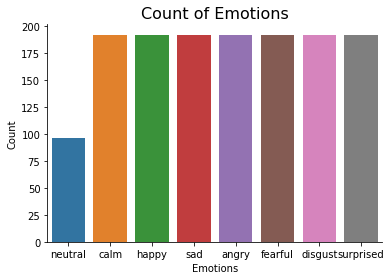

In [22]:
#Drawing a countplot
import seaborn as sns
sns.countplot(df.Emotions)
plt.xlabel('Emotions',size=10)
plt.ylabel('Count',size=10)
plt.title('Count of Emotions',size=16)
sns.despine()
plt.show()

### Wave-plot of audiofile

In [23]:
# Creating waveplot 
def createWave(data, sr, x):
    img=librosa.display.waveshow(data, sr=sr)
    plt.title('Waveplot for {} emotion'.format(x), size=16)
    plt.figure(figsize=(10,4))
    plt.show()

### Spectrogram of audiofile

In [24]:
# Creating spectogram
def createSpectrogram(data, sr, x):
    s=np.abs(librosa.stft(data))
    S=librosa.amplitude_to_db(s, ref=np.max)
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
    plt.title('Spectrogram for {} emotion'.format(x), size=16)
    plt.colorbar(format='%+2.f dB')
    plt.figure(figsize=(10,4))
    plt.show()

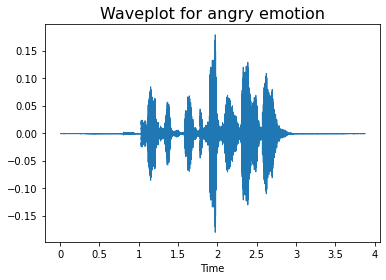

<Figure size 720x288 with 0 Axes>

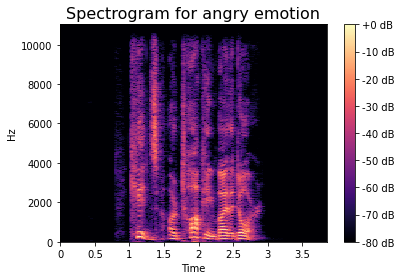

<Figure size 720x288 with 0 Axes>

In [25]:
# drawing waveplot and spectrogram for angry emotion

emotion='angry'
path=np.array(df.FilePath[df.Emotions==emotion])[0]
file, sr=librosa.load(path)
createWave(file, sr, emotion)
createSpectrogram(file, sr, emotion)
Audio(path)

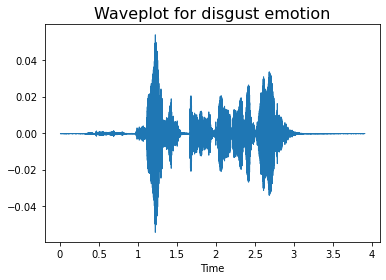

<Figure size 720x288 with 0 Axes>

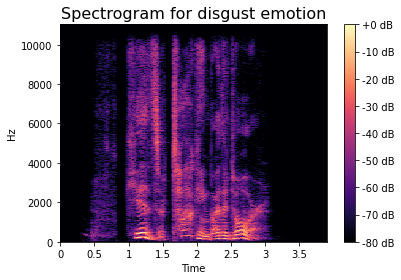

<Figure size 720x288 with 0 Axes>

In [26]:
# drawing waveplot and spectrogram for disgust emotion

emotion='disgust'
path1=np.array(df.FilePath[df.Emotions==emotion])[1]
file, sr=librosa.load(path1)
createWave(file, sr, emotion)
createSpectrogram(file, sr, emotion)
Audio(path1)

### Data Augmentation

In [27]:
data, sr=librosa.load(path1)

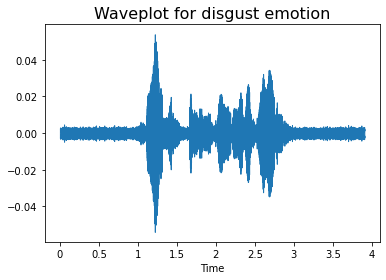

<Figure size 720x288 with 0 Axes>

In [28]:
# Adding noise

def add_noise(data):
    x=data.std()
    noise=np.random.normal(0, x, data.size)
    aug_data=data + noise*0.2
    return aug_data

noise_data=add_noise(data)
createWave(noise_data, sr, emotion)

In [29]:
import soundfile as sf

sf.write('added_noise.wav', noise_data, sr)
Audio('added_noise.wav')

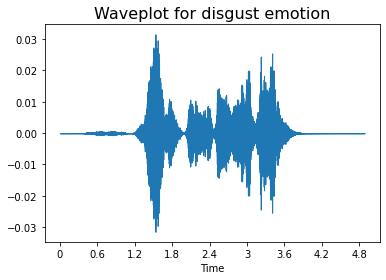

<Figure size 720x288 with 0 Axes>

In [30]:
# Time-Stretch

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

stretch_data=stretch(data)

sf.write('stretch_time.wav', stretch_data, sr)
createWave(stretch_data, sr, emotion)
Audio('stretch_time.wav')

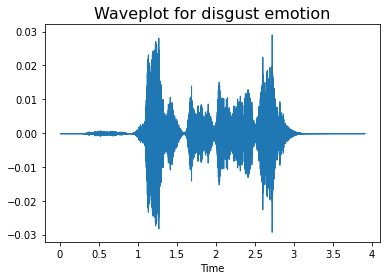

<Figure size 720x288 with 0 Axes>

In [31]:
# Pitch-Shift

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=0.7)

pitchShift_data=pitch(data)

sf.write('shift_pitch.wav', pitchShift_data, sr)
createWave(pitchShift_data, sr, emotion)
Audio('shift_pitch.wav')

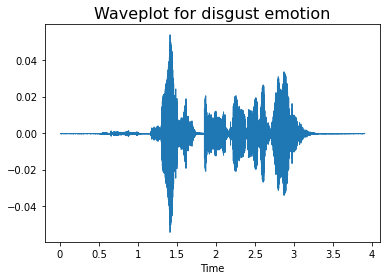

<Figure size 720x288 with 0 Axes>

In [32]:
# Shift Data

def shift(data):
    shiftRange=int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shiftRange)

shift_data=shift(data)

sf.write('shift_data.wav', shift_data, sr)
createWave(shift_data, sr, emotion)
Audio('shift_data.wav')

### Feature Extraction

In [1]:
# Extracting 3 important features i.e. mfcc, chroma, mel-spectrogram

def extractFeature(path, mfcc, chroma, mel):
    data, sr=librosa.load(path)
    
    res=np.array([])
    
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
        res=np.hstack((res, mfccs))
    
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
        res=np.hstack((res, chroma))
    
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(data, sr=sr).T, axis=0)
        res=np.hstack((res, mel))
    
    return res

In [2]:
x=[]

ravdess='C:\\Users\\asus\\Speech Emotion Recognition\\RAVDESS Dataset'
actorsfolder=os.listdir(ravdess)
for actors in actorsfolder:
    actor=os.listdir(ravdess + '\\' + actors)
    for file in actor:
        path=(ravdess + '\\' + actors + '\\' + file)
        features=extractFeature(path, mfcc=True, chroma=True, mel=True)
        x.append(features)    

NameError: name 'os' is not defined

In [42]:
x=df.FilePath.apply(lambda x: extractFeature(x, mfcc=True, chroma=True, mel=True))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [46]:
paths=[i for i in df.FilePath]
for path in paths:
    

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [ ]:
np.array(x)

In [ ]:
# Saving featues array in a file to save time 
file=open('Features_mlp_ravdess', 'wb')
np.save(file, x)
file.close()

In [ ]:
# Loding the features file
file=open('Features_mlp_ravdess', 'rb')
features=np.load(file)
type(features)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=9)


In [ ]:
x_train.shape, x_test.shape

In [ ]:
#Features extracted
x_train.shape[1]

### Initialising model

In [ ]:
model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(500,),learning_rate='adaptive', max_iter=2000)


In [ ]:
# Training Model

model.fit(x_train,y_train)

In [ ]:
#import joblib

#joblib.dump(model, 'model.pkl')
#clf=joblib.load('model.pkl')

In [ ]:
#predicting using model
exp_y = y_test
pred_y = model.predict(x_test)

In [ ]:
cm=confusion_matrix(exp_y, pred_y)
cm

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(exp_y, pred_y))

In [ ]:
accuracy_score(y_true=y_test, y_pred=pred_y)*100

In [ ]:
model.score(x_test,y_test)